In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [2]:
y_1day = pd.read_csv('../data/y/X1_kodex(1d).csv',index_col=0)

In [3]:
# 인덱스를 datetime 형식으로 변환
y_1day.index = pd.to_datetime(y_1day.index, format='%Y%m%d')

# 인덱스를 YYYY-MM-DD 형식의 문자열로 변환
y_1day.index = y_1day.index.strftime('%Y-%m-%d')

In [4]:
y_1day['1day_return'] = y_1day['open'] - y_1day['close']
y_1day = y_1day[['1day_return']]


In [5]:
y_0900_0910 = pd.read_csv('../data/y_diff/y_0900_0910.csv',index_col=0)
y_0900_0915 = pd.read_csv('../data/y_diff/y_0900_0915.csv',index_col=0)
y_0900_0920 = pd.read_csv('../data/y_diff/y_0900_0920.csv',index_col=0)
y_0900_0925 = pd.read_csv('../data/y_diff/y_0900_0925.csv',index_col=0)
y_0900_0930 = pd.read_csv('../data/y_diff/y_0900_0930.csv',index_col=0)
y_0900_0935 = pd.read_csv('../data/y_diff/y_0900_0935.csv',index_col=0)
y_0900_0940 = pd.read_csv('../data/y_diff/y_0900_0940.csv',index_col=0)
y_0900_0945 = pd.read_csv('../data/y_diff/y_0900_0945.csv',index_col=0)
y_0900_0950 = pd.read_csv('../data/y_diff/y_0900_0950.csv',index_col=0)
y_0900_0955 = pd.read_csv('../data/y_diff/y_0900_0955.csv',index_col=0)
y_0900_1000 = pd.read_csv('../data/y_diff/y_0900_1000.csv',index_col=0)

In [6]:
y_0900_0910

,date,y_rate_0910
0,20181001,54
1,20181002,23
2,20181004,-108
3,20181005,-27
4,20181008,18
...,...,...
1236,20231020,-35
1237,20231023,-25
1238,20231024,-50
1239,20231025,-25


In [7]:
df_list = [y_0900_0910, y_0900_0915, y_0900_0920, y_0900_0925, y_0900_0930, y_0900_0935, y_0900_0940, y_0900_0945,
        y_0900_0950, y_0900_0955, y_0900_1000]
df_list_1 = ["y_0900_0910", 'y_0900_0915', 'y_0900_0920', 'y_0900_0925', 'y_0900_0930', 'y_0900_0935', 'y_0900_0940', 'y_0900_0945',
            'y_0900_0950', 'y_0900_0955', 'y_0900_1000']

In [10]:
for i in df_list :
    y_0900_0910 = pd.merge(y_0900_0910, i, on='date', how='inner')

In [11]:
y = y_0900_0910

In [12]:
y['date'] = pd.to_datetime(y['date'], format='%Y%m%d')
y.set_index('date', inplace=True)

In [13]:
y_1day.index = pd.to_datetime(y_1day.index , format='%Y-%m-%d')

In [14]:
y.index

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-04', '2018-10-05',
               '2018-10-08', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-15', '2018-10-16',
               ...
               '2023-10-13', '2023-10-16', '2023-10-17', '2023-10-18',
               '2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24',
               '2023-10-25', '2023-10-26'],
              dtype='datetime64[ns]', name='date', length=1241, freq=None)

In [15]:
result = pd.merge(y, y_1day, left_index=True, right_index=True, how='inner')

In [16]:
result

,y_rate_0910_x,y_rate_0910_y,y_rate_0915,y_rate_0920,y_rate_0925,y_rate_0930,y_rate_0935,y_rate_0940,y_rate_0945,y_rate_0950,y_rate_0955,y_rate_1000,1day_return
date,,,,,,,,,,,,,
2018-10-01,54,54,32,5,0,-13,-112,-108,-121,-130,-126,-144,49
2018-10-02,23,23,-4,32,27,36,36,54,59,68,72,59,306
2018-10-04,-108,-108,-166,-153,-193,-193,-220,-225,-256,-256,-243,-243,450
2018-10-05,-27,-27,-45,9,49,72,85,81,54,22,31,49,0
2018-10-08,18,18,23,41,59,86,77,81,72,99,108,99,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,-35,-35,-110,-150,-220,-195,-210,-265,-280,-300,-340,-300,235
2023-10-23,-25,-25,20,75,-40,-60,-60,5,55,0,5,25,135
2023-10-24,-50,-50,-70,-60,-150,-110,-115,-115,-155,-165,-195,-175,-95


In [17]:
result.drop(columns='0_rate_y',inplace=True)

KeyError: "['0_rate_y'] not found in axis"

In [ ]:
result.columns = ['y_0910','y_0915', "y_0920",'y_0925','y_0930','y_0935','y_0940','y_0945','y_0950','y_0955','y_1000','y_1day']


In [ ]:
print(y.corr(method='pearson'))

          0_rate_x  0_rate_y    1_rate    2_rate    3_rate    4_rate  \
0_rate_x  1.000000  1.000000  0.792958  0.735385  0.650741  0.624235   
0_rate_y  1.000000  1.000000  0.792958  0.735385  0.650741  0.624235   
1_rate    0.792958  0.792958  1.000000  0.904846  0.813986  0.773812   
2_rate    0.735385  0.735385  0.904846  1.000000  0.916620  0.863248   
3_rate    0.650741  0.650741  0.813986  0.916620  1.000000  0.935025   
4_rate    0.624235  0.624235  0.773812  0.863248  0.935025  1.000000   
5_rate    0.589584  0.589584  0.738307  0.821022  0.897075  0.952554   
6_rate    0.552744  0.552744  0.694403  0.776894  0.843551  0.901745   
7_rate    0.538234  0.538234  0.677742  0.758588  0.817190  0.869222   
8_rate    0.521052  0.521052  0.678124  0.745558  0.795379  0.843824   
9_rate    0.522327  0.522327  0.659483  0.724416  0.770720  0.818721   
10_rate   0.508398  0.508398  0.642520  0.708123  0.757292  0.803067   

            5_rate    6_rate    7_rate    8_rate    9_rate   10

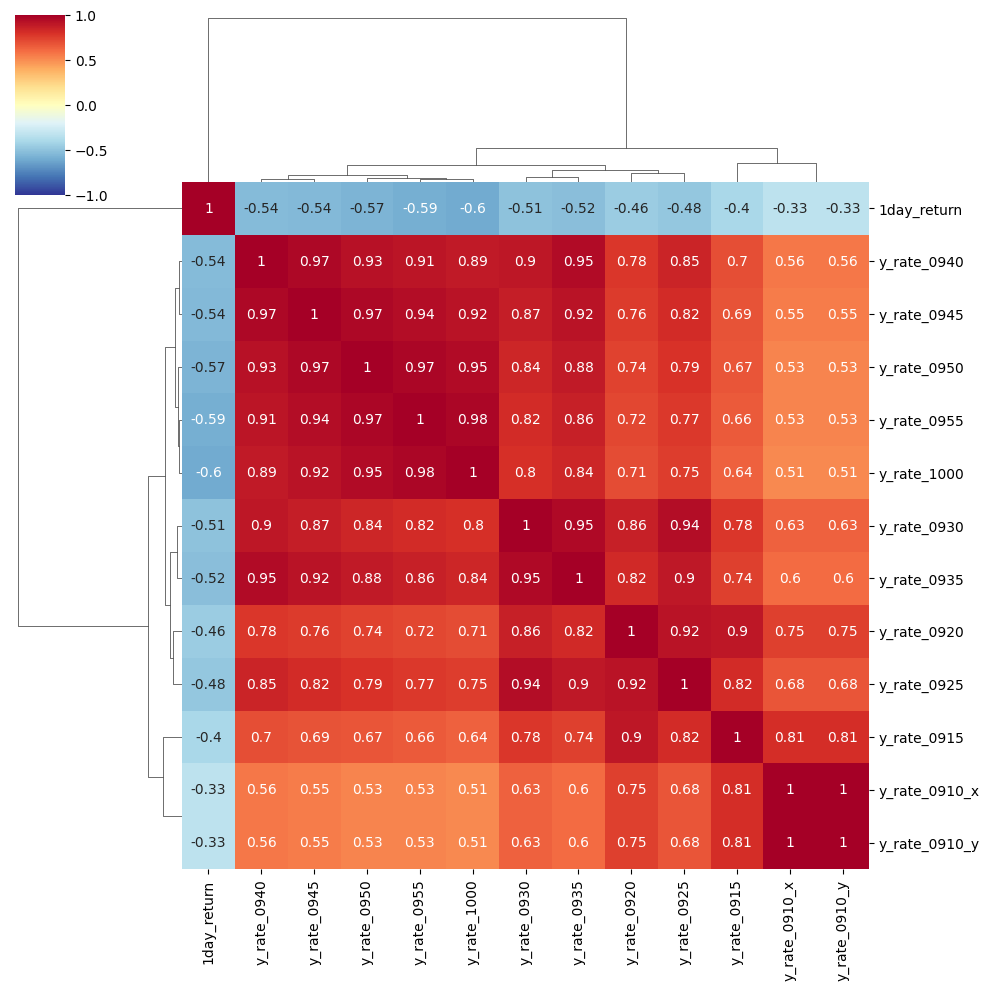

In [18]:
df = result.corr()

sns.clustermap(df, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )